# Social Media User Activity Analysis

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

## Load Dataset

In [4]:
df=pd.read_csv("C:\\Users\\neebu\\Downloads\\social_media_user_activity\\instagram_usage_lifestyle.csv")

In [5]:
df.head()

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03


In [6]:
df.tail()

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
1547891,1547892,Instagram,61,Female,United States,Suburban,High,Full-time employed,Master’s,Widowed,...,2025-01-14,15.8,Videos,Other,Friends only,Yes,Yes,4,Free,0.97
1547892,1547893,Instagram,42,Male,United States,Urban,Lower-middle,Full-time employed,Master’s,Divorced,...,2025-08-04,38.0,Photos,Art,Private,No,No,1,Premium,1.32
1547893,1547894,Instagram,32,Male,Canada,Urban,Low,Full-time employed,Master’s,Single,...,2025-04-10,31.8,Live,Other,Private,Yes,Yes,5,Free,1.01
1547894,1547895,Instagram,14,Female,Other,Urban,Low,Student,Bachelor’s,Single,...,2025-03-21,23.6,Live,Tech,Private,Yes,No,3,Free,1.11
1547895,1547896,Instagram,22,Female,Japan,Urban,Lower-middle,Full-time employed,PhD,Single,...,2025-06-15,28.5,Reels,Music,Friends only,Yes,Yes,2,Free,2.07


In [7]:
df.describe()

,user_id,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,...,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,notification_response_rate,account_creation_year,average_session_length_minutes,linked_accounts_count,user_engagement_score
count,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,...,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06
mean,7.739485e+05,3.898544e+01,7.143480e+00,6.999384e+00,1.998774e+01,5.499804e+00,2.500084e+01,1.244917e+02,7.950007e+01,8.000105e+03,...,3.762037e+01,3.295203e+01,5.647662e+01,2.160543e+03,2.604942e+03,5.002404e-01,2.017501e+03,2.050971e+01,1.975254e+00,1.644642e+00
std,4.468392e+05,1.529453e+01,3.994556e+00,1.097098e+00,1.183258e+01,2.871232e+00,3.976188e+00,2.020699e+01,1.154874e+01,8.939761e+01,...,2.535788e+01,2.144569e+01,3.534782e+01,3.402016e+03,2.751922e+03,2.887827e-01,4.611735e+00,8.697454e+00,1.352058e+00,1.812684e+00
min,1.000000e+00,1.300000e+01,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,9.000000e+01,6.000000e+01,7.566000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,2.000000e+01,0.000000e+00,2.010000e+03,5.000000e+00,0.000000e+00,6.700000e-01
25%,3.869748e+05,2.600000e+01,4.000000e+00,6.300000e+00,1.000000e+01,3.000000e+00,2.230000e+01,1.070000e+02,7.000000e+01,7.940000e+03,...,1.800000e+01,1.600000e+01,2.900000e+01,5.430000e+02,6.630000e+02,2.500000e-01,2.013000e+03,1.330000e+01,1.000000e+00,1.000000e+00
50%,7.739485e+05,3.900000e+01,6.600000e+00,7.000000e+00,2.000000e+01,5.000000e+00,2.500000e+01,1.240000e+02,7.900000e+01,8.000000e+03,...,3.400000e+01,3.100000e+01,5.400000e+01,1.154000e+03,1.519000e+03,5.000000e-01,2.017000e+03,2.040000e+01,2.000000e+00,1.100000e+00
75%,1.160922e+06,5.200000e+01,9.700000e+00,7.700000e+00,3.000000e+01,8.000000e+00,2.770000e+01,1.420000e+02,9.000000e+01,8.060000e+03,...,5.300000e+01,4.700000e+01,8.000000e+01,2.459000e+03,3.451000e+03,7.500000e-01,2.022000e+03,2.760000e+01,3.000000e+00,1.290000e+00
max,1.547896e+06,6.500000e+01,2.410000e+01,1.000000e+01,4.000000e+01,1.000000e+01,4.500000e+01,1.590000e+02,9.900000e+01,8.473000e+03,...,1.710000e+02,1.380000e+02,2.220000e+02,2.088110e+05,1.000000e+04,1.000000e+00,2.025000e+03,5.200000e+01,5.000000e+00,1.867000e+01


## Data Prepration

In [8]:
df.isnull().sum()

user_id                           0
app_name                          0
age                               0
gender                            0
country                           0
urban_rural                       0
income_level                      0
employment_status                 0
education_level                   0
relationship_status               0
has_children                      0
exercise_hours_per_week           0
sleep_hours_per_night             0
diet_quality                      0
smoking                           0
alcohol_frequency                 0
perceived_stress_score            0
self_reported_happiness           0
body_mass_index                   0
blood_pressure_systolic           0
blood_pressure_diastolic          0
daily_steps_count                 0
weekly_work_hours                 0
hobbies_count                     0
social_events_per_month           0
books_read_per_year               0
volunteer_hours_per_month         0
travel_frequency_per_year   

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(1547896, 58)

In [11]:
df.dtypes

user_id                             int64
app_name                           object
age                                 int64
gender                             object
country                            object
urban_rural                        object
income_level                       object
employment_status                  object
education_level                    object
relationship_status                object
has_children                       object
exercise_hours_per_week           float64
sleep_hours_per_night             float64
diet_quality                       object
smoking                            object
alcohol_frequency                  object
perceived_stress_score              int64
self_reported_happiness             int64
body_mass_index                   float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
daily_steps_count                   int64
weekly_work_hours                 float64
hobbies_count                     

In [12]:
df.nunique()

user_id                           1547896
app_name                                1
age                                    53
gender                                  4
country                                10
urban_rural                             3
income_level                            5
employment_status                       6
education_level                         6
relationship_status                     5
has_children                            2
exercise_hours_per_week               241
sleep_hours_per_night                  71
diet_quality                            5
smoking                                 3
alcohol_frequency                       5
perceived_stress_score                 41
self_reported_happiness                10
body_mass_index                       286
blood_pressure_systolic                70
blood_pressure_diastolic               40
daily_steps_count                     773
weekly_work_hours                     800
hobbies_count                     

## EDA - Data Visualizations

In [14]:
df['last_login_date']=pd.to_datetime(df['last_login_date'])

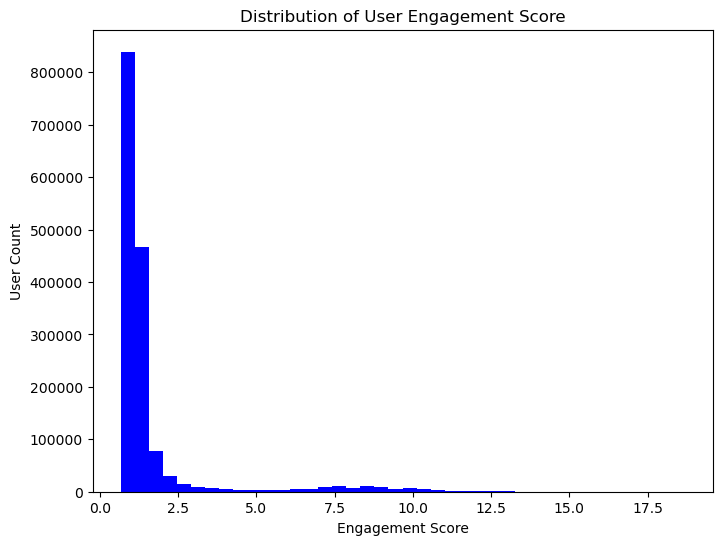

In [15]:
plt.figure(figsize=(8,6))
plt.hist(df['user_engagement_score'],bins=40,color='blue')
plt.title("Distribution of User Engagement Score")
plt.xlabel("Engagement Score")
plt.ylabel("User Count")
plt.show()

In [16]:
app_engagement_score=df.groupby("app_name")["user_engagement_score"].mean()

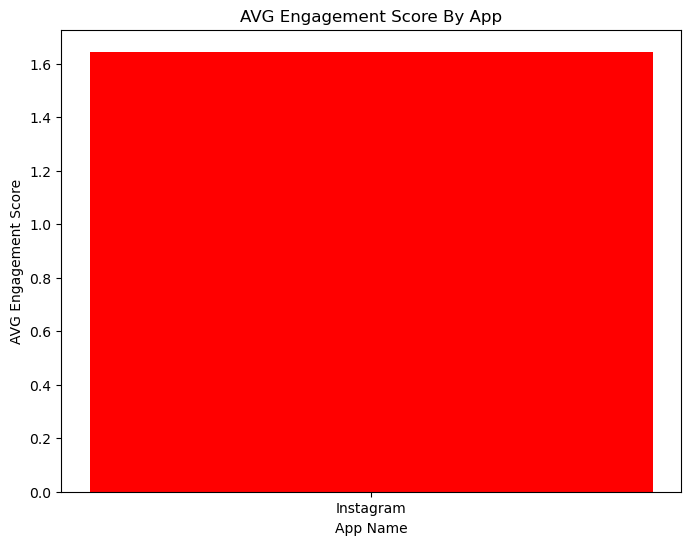

In [17]:
plt.figure(figsize=(8,6))
plt.bar(app_engagement_score.index,app_engagement_score.values,color='red')
plt.title("AVG Engagement Score By App")
plt.xlabel("App Name")
plt.ylabel("AVG Engagement Score")
plt.show()

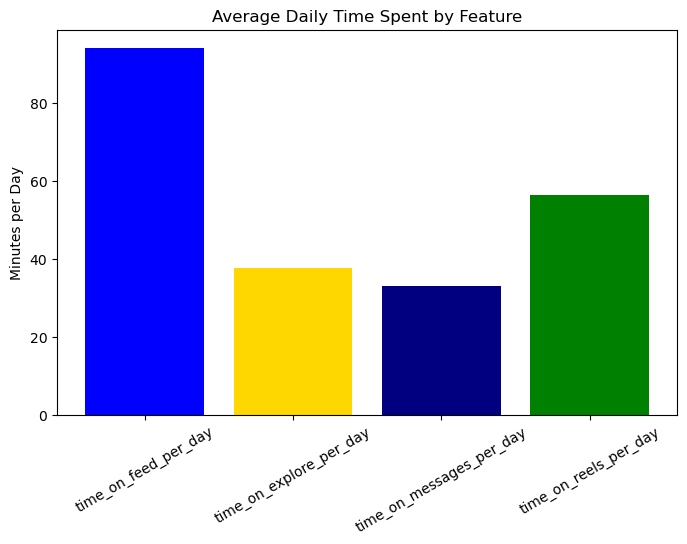

In [18]:
time_cols = [
    'time_on_feed_per_day',
    'time_on_explore_per_day',
    'time_on_messages_per_day',
    'time_on_reels_per_day'
]

time_mean = df[time_cols].mean()

plt.figure(figsize=(8,5))
plt.bar(time_mean.index, time_mean.values,
        color=['blue', 'gold', 'navy', 'green'])

plt.title("Average Daily Time Spent by Feature")
plt.ylabel("Minutes per Day")
plt.xticks(rotation=30)
plt.show()

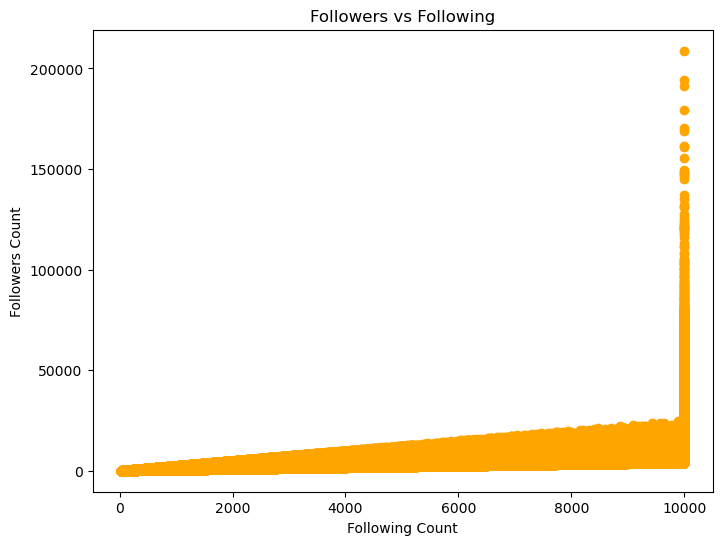

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(df['following_count'],df['followers_count'],color="orange")
plt.title("Followers vs Following")
plt.xlabel("Following Count")
plt.ylabel("Followers Count")
plt.show()

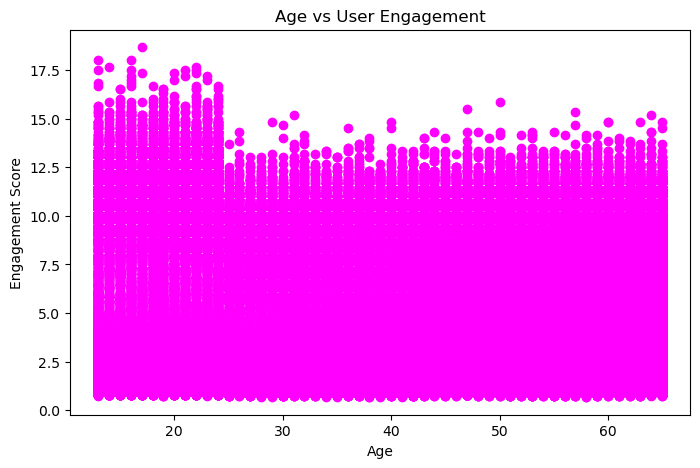

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(df['age'],df['user_engagement_score'],color='magenta')
plt.title("Age vs User Engagement")
plt.xlabel("Age")
plt.ylabel("Engagement Score")
plt.show()

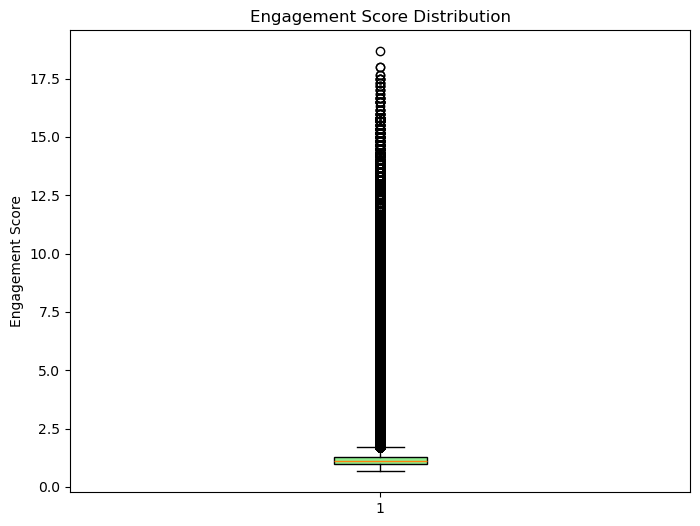

In [21]:
plt.figure(figsize=(8,6))
plt.boxplot(df['user_engagement_score'],patch_artist=True,boxprops=dict(facecolor='lightgreen'))
plt.title("Engagement Score Distribution")
plt.ylabel("Engagement Score")
plt.show()

In [22]:
Gender=df.groupby('gender')['user_engagement_score'].mean()

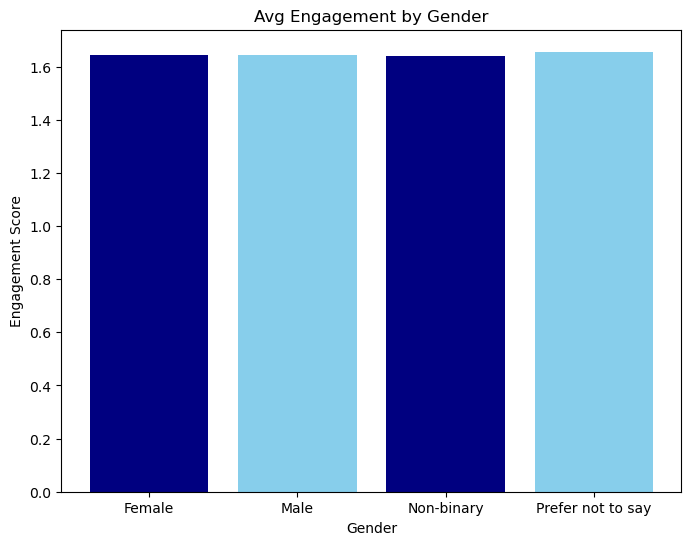

In [23]:
plt.figure(figsize=(8,6))
plt.bar(Gender.index,Gender.values,color=['navy','skyblue'])
plt.title("Avg Engagement by Gender")
plt.xlabel("Gender")
plt.ylabel("Engagement Score")
plt.show()

In [24]:
content_interest=(df.groupby('content_type_preference')['user_engagement_score'].mean().sort_values())

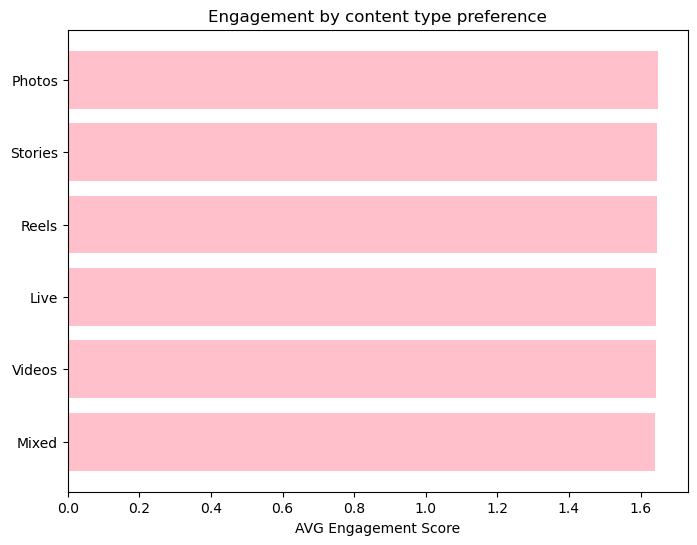

In [25]:
plt.figure(figsize=(8,6))
plt.barh(content_interest.index,content_interest.values,color='pink')
plt.title("Engagement by content type preference")
plt.xlabel("AVG Engagement Score")
plt.show()

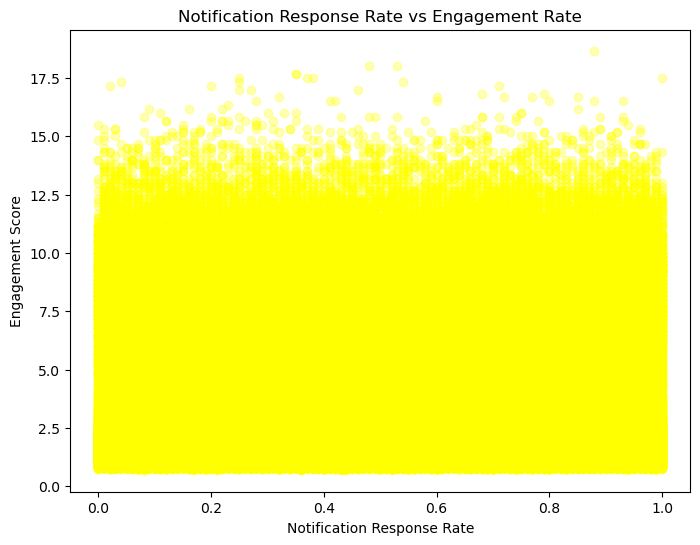

In [26]:
plt.figure(figsize=(8,6))
plt.plot(df['notification_response_rate'],df['user_engagement_score'],'o',color='yellow',alpha=0.3)
plt.title("Notification Response Rate vs Engagement Rate")
plt.xlabel("Notification Response Rate")
plt.ylabel("Engagement Score")
plt.show()

## Feature Engineering

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [29]:
if 'last_login_date' in df.columns:
    df['last_login_date'] = pd.to_datetime(df['last_login_date'], errors='coerce')
    df['last_login_year'] = df['last_login_date'].dt.year
    df['last_login_month'] = df['last_login_date'].dt.month
    df.drop(columns=['last_login_date'], inplace=True)

In [30]:
df['engagement_class'] = np.where(
    df['user_engagement_score'] >= df['user_engagement_score'].median(),
    1, 0
)

In [31]:
yes_no_cols = [
    'has_children',
    'uses_premium_features',
    'two_factor_auth_enabled',
    'biometric_login_used'
]

for col in yes_no_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

In [32]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col], _ = pd.factorize(df[col])

In [33]:
X = df.drop(columns=[
    'user_id',
    'user_engagement_score',
    'engagement_class'])

y = df['engagement_class']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Evaluation

In [35]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1),
    "Naive Bayes": GaussianNB()
}

accuracy_scores = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores[name] = accuracy_score(y_test, y_pred) * 100
    predictions[name] = y_pred

    print(f"{name} Accuracy: {accuracy_scores[name]:.2f}%")

Logistic Regression Accuracy: 99.90%
Decision Tree Accuracy: 96.28%
Random Forest Accuracy: 93.48%
Naive Bayes Accuracy: 78.82%


Asses Model performance using Metrics
## Deployment

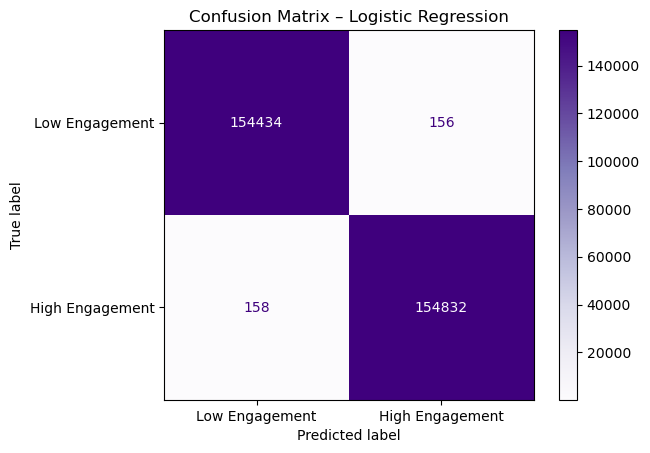

In [39]:
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_pred = predictions[best_model]

cm = confusion_matrix(y_test, best_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Low Engagement", "High Engagement"]
)

disp.plot(cmap="Purples")
plt.title(f"Confusion Matrix – {best_model}")
plt.show()

## Model performance 

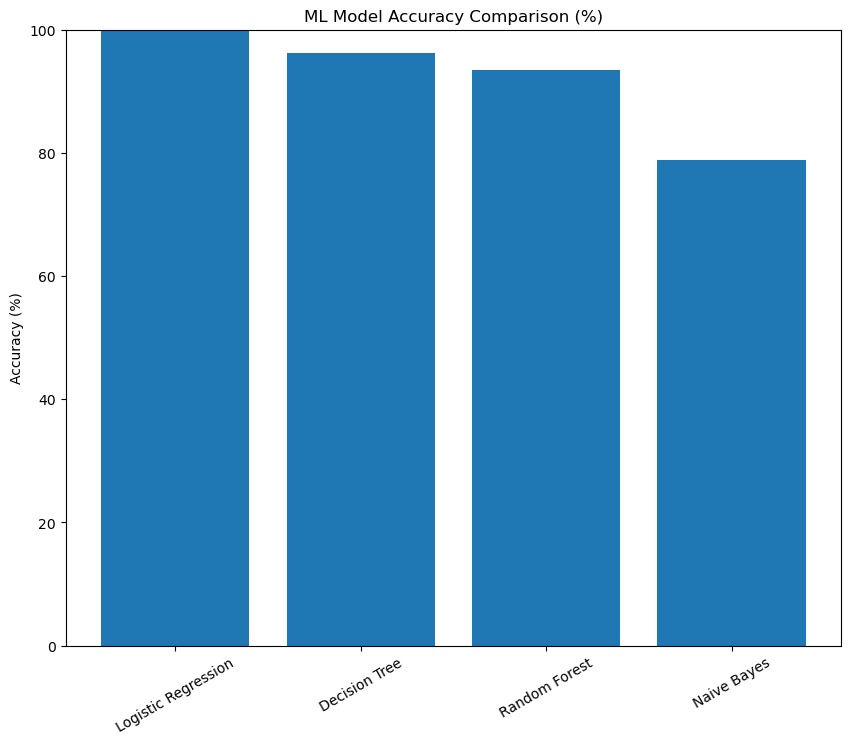

In [41]:
plt.figure(figsize=(10,8))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.title("ML Model Accuracy Comparison (%)")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=30)
plt.show()

Here,The final result shows that the Logistic Regression model gives maximum Accuracy score. compare with other model it perform well with Social Media User Activity Analysis Dataset.